# Motivation

As an environmental engineering PhD student I have become interested in water quality models of Puget Sound that predict how nutrients may contribute to changes in dissolved oxygen (DO) levels. The main source of nitrogen--the limiting nutrient for primary production in Puget Sound--[is the ocean (Khangaonkar, 2018)](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2017JC013650), but the ocean's effect is limited by hydrodynamic mixing into surface waters. To address water quality concerns the Washington Department of Ecology is currently considering limiting the allowed amount of nutrients discharged from wastewater treatment plants, and this will [entail expensive upgrades](https://kingcounty.gov/~/media/services/environment/wastewater/mwpaac/docs/2020/2020_09_23_Nutrient-Removal.ashx) that could be passed along to ratepayers in the region. Because of the amount of money at stake, it is important to get a good picture of how changes in nutrient levels could be expected to impact the Sound.

Water quality models of an estuary like Puget Sound are dependent upon a firm understanding of hydrodynamics, as currents and tides are incredibly important for transport and mixing processes. One key variable is the wind, which can influence mixing. Water quality models often use one or more nearby airports with automated surface wind observations, but [an airport does not always have the same wind conditions as the water body being modeled]. Puget Sound, in particular, is a large system which has multiple wind observation locations scattered around it. Through an analysis of available wind data, I hope to discover how winds in Puget Sound vary with location and time, then assess whether the modeled years of 2006, 2014 and 2016 experienced winds that are a good representation of the types of wind conditions in the historical record. I also hope to identify significant gaps in the observational record that could introduce uncertainty when this data is used in a model of Puget Sound. In the future I hope to build on this investigation with a wind sensitivity analysis of the Salish Sea Model, basing my design on how I determine the winds tend to vary in reality.

# Data

I intend to pull wind observations from the [Integrated Surface Database (ISD)](https://www.ncdc.noaa.gov/isd), a dataset published by NOAA's National Centers for Environmental Information (formerly the National Climate Data Center). The ISD-Lite dataset, in particular, contains simplified hourly observations of wind speed and direction from 35,000 stations worldwide (many of them airports), about 20 of which are located around Puget Sound. Some stations have data going as far back as 1901, though I suspect I will limit my investigation to recent decades as there are very few stations going back that far. Only 8-9 were active in the 1980s, for instance:

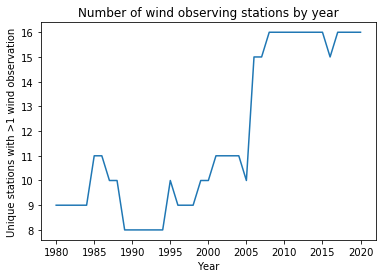

While this data does not directly include observations of wind speed over the waters of Puget Sound, I believe that variability in the data may be representative of Puget Sound surface winds. The Salish Sea model itself relies on model outputs from UW's Mesoscale Analysis and Forecasting Group for wind data ([Ahmed et al, 2019](https://fortress.wa.gov/ecy/publications/SummaryPages/1903001.html)), and I believe that falling back on actual wind observations may be a better way to get a sense for how surface winds are behaving as this should sidestep any uncertainties in the underlying meteorological model.

The data from US climate stations appears to be licensed for use without restriction, although the terms are not clearly specified.

One possible ethical concern is the presence of coverage gaps in certain regions around Puget Sound. If reliability of wind data in certain underserved regions is low, it may lead to greater inaccuracies in my ultimate conclusions for those underserved regions, thereby propagating a bias against understanding environmental behavior in those areas. But this is one of the observational gaps I intend to consider in my analysis.

# Unknowns

While I have downloaded data for about 20 stations from 1980 through the present and written initial processing code, I have not thoroughly examined the data to see how much is actually available. The above graph shows that very few stations are available over a timespan of decades, which is important for capturing the effects of long-term climate cycles in the Pacific Northwest. Observational gaps in climate data are usually filled in by using well-correlating observations taken at the same time, but in this case correlation between stations is almost always quite poor. To examine observations over a long timespan, I may have to only consider a handful of stations with data going back that far, then perform a separate analysis on a larger set of stations that have been available for the past ten years to look at spatial patterns. So the complexity might balloon, but I think I can still create interesting results at any level of completion of the project.

# Research Questions

* What is the historic variability in wind speed and direction in the Puget
  Sound region?
* How correlated are the reported wind speeds and directions from different
  stations along the coast, in the Strait of Juan de Fuca, etc?
* Do wind characteristics seem to correlate with major climate cycles like
  ENSO and the PDO?
* Do the SSM calibration years represent typical conditions, or are they outliers?
* Are there outlier years in the historical data with conditions which should be covered in a future sensitivity analysis?

# Background

Surface winds over Puget Sound and offshore have a variety of forcing effects. Winds strongly influence upwelling off the coast, which affects water temperatures, salinity and nutrients. The prevailing winds tend to be related to long-term climate variability through phenomena like the El Nino Southern Oscillation (ENSO) and the Pacific Decadal Oscillation (PDO). There are also short-term effects of winds, like storm events changing the prevailing wind direction. ([Moore et al, 2008](https://doi.org/10.4319/lo.2008.53.5.1746))

The Salish Sea Model (SSM) is a recently developed hydrodynamic and water quality model of the Puget Sound with a model domain that extends over the entire Salish Sea, the Strait of Juan de Fuca, and the Pacific continental shelf as far north as the Strait of Georgia and south to the Columbia River mouth. The model has been calibrated to run under conditions from three different years: 2006, 2014, and 2016. The goal is to develop a model that is able to predict water quality parameters under various scenarios (such as freshwater discharges and future climate conditions) to inform policy decisions. Environmental models are simply idealized representations of a natural system, and while they cannot be truly verified, they can be used to identify potentially important aspects of the system using sensitivity analyses ([Oreskes, Shrader-Frechette, and Belitz, 1994](https://doi.org/10.1126/science.263.5147.641)). The SSM has not been thoroughly evaluated for its sensitivity to winds.

# Methodology

ISD-Lite observations can be downloaded from a NOAA FTP site as individual compressed text files, with each file representing a single year of data for a single station. All of the station data since 1980 comprises over 400 files and 230 MB of data; a Python notebook has already been written to automate the downloading and initial processing of these individual files into a single large dataset.

Processing will occur in stages. Since data is not available from all stations for all years, two analyses will be performed: one which includes as many stations as possible over a short time horizon (since 2010 or so), and another including only the handful of stations with a consistent data record going back multiple decades. This allows examining the complete history of data as well as the spatial variability without introducing sampling biases into the probability distributions.

For wind directions, histograms will be developed to determine the prevailing directions at different points in time. How the probability distribution changes with season and year will be evaluated (with line graphs of key distribution parameters expected), while attempting to correlate any long-term variability to natural climate cycles with a principal component analysis.

For wind speeds, attempts will be made to characterize the distribution across stations. Certain characteristics of the distributions will be examined, such as quartiles and the fraction of the time that winds are calm. Like with wind direction, such metrics can be examined in terms of how they change with season and between different years (looking for outlier years), then correlations can be attempted with climate cycles using a principal component analysis. Plots will be produced of how these metrics change with season and over time.

Simultaneous wind speeds and directions at different observation stations will also be cross-correlated to see how similar the observations are across the region.

Finally, the model calibration years of 2006, 2014, and 2016 will be identified and characterized individually, then compared to the overall sample of observations to see how they compare to the overall record. A Wilcoxon rank-sum test ([Devore, 2016; pp 661-666](https://www.cengage.com/c/probability-and-statistics-for-engineering-and-the-sciences-9e-devore/9781305251809PF/)) will likely be employed as the populations for wind speed and direction are not normally distributed.